In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
test=pd.read_csv('test_csv2022.csv')
test.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,27345,1,BHK,Independent House,Whitefield Hope Farm Junction,1088,Semi-Furnished,1,Bangalore,1,5,1,0,1,1,0,175749,1,0,700
1,111493,1,BHK,Studio Apartment,Worli,605,Furnished,1,Mumbai,0,1,0,0,0,1,1,15072,0,0,600
2,176972,3,BHK,Apartment,Aundh,1005,Furnished,4,Pune,1,5,0,0,0,1,1,29715,1,0,1900
3,66650,3,RK,Apartment,Sarvpriya Vihar,639,Semi-Furnished,3,Delhi,1,18,1,1,1,1,1,131576,1,1,3300
4,72437,1,BHK,Apartment,Khirki Extension,580,Unfurnished,1,Delhi,0,9,0,0,0,0,1,26005,0,1,1600


In [3]:
train=pd.read_csv('train_csv2022.csv')

In [4]:
train.head()

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,...,0,0,0,1,0,33012,0,0,1500,4716
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,...,0,0,0,1,0,74907,1,1,300,24969
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,...,0,0,0,0,0,217314,1,0,1300,24146
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,...,1,0,0,1,0,217560,1,1,3600,36260
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,...,1,1,1,1,0,704624,1,1,200,176156


In [5]:
train.shape,test.shape

((114480, 21), (20203, 20))

In [6]:
df=pd.concat([train,test])

In [7]:
df

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,...,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood,price
0,100361,4,BHK,Apartment,Sodepur,805,Furnished,2,Kolkata,1,...,0,0,0,1,0,33012,0,0,1500,4716.0
1,66785,2,BHK,Apartment,Geetanjali Enclave,1093,Furnished,2,Delhi,1,...,0,0,0,1,0,74907,1,1,300,24969.0
2,120243,2,RK,Independent Floor,Ghatkopar West,1227,Unfurnished,2,Mumbai,0,...,0,0,0,0,0,217314,1,0,1300,24146.0
3,96487,1,BHK,Apartment,New Town,1022,Furnished,3,Kolkata,0,...,1,0,0,1,0,217560,1,1,3600,36260.0
4,95695,2,BHK,Apartment,New Town,1403,Semi-Furnished,2,Kolkata,0,...,1,1,1,1,0,704624,1,1,200,176156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20198,137607,1,BHK,Apartment,Andheri East,574,Unfurnished,4,Mumbai,1,...,1,0,0,0,0,228582,1,1,200,NaN
20199,43656,1,BHK,Apartment,Vanagaram,1961,Furnished,2,Chennai,0,...,1,0,0,1,0,72714,1,0,900,NaN
20200,14331,3,BHK,Apartment,Bopal,2130,Unfurnished,2,Ahmedabad,0,...,1,0,0,0,0,243550,0,0,1500,NaN
20201,80835,2,BHK,Apartment,Kirti Nagar,5637,Semi-Furnished,2,Delhi,0,...,0,0,1,1,0,111324,1,1,2600,NaN


In [8]:
df.isnull().sum()

Property_ID             0
room                    0
layout_type             0
property_type           0
locality                0
area                    0
furnish_type            0
bathroom                0
city                    0
parking_spaces          0
floor                   0
pet_friendly            0
power_backup            0
washing_machine         0
air_conditioner         0
geyser/solar            0
security_deposit        0
CCTV/security           0
lift                    0
neighbourhood           0
price               20203
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134683 entries, 0 to 20202
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Property_ID       134683 non-null  int64  
 1   room              134683 non-null  int64  
 2   layout_type       134683 non-null  object 
 3   property_type     134683 non-null  object 
 4   locality          134683 non-null  object 
 5   area              134683 non-null  int64  
 6   furnish_type      134683 non-null  object 
 7   bathroom          134683 non-null  int64  
 8   city              134683 non-null  object 
 9   parking_spaces    134683 non-null  int64  
 10  floor             134683 non-null  int64  
 11  pet_friendly      134683 non-null  int64  
 12  power_backup      134683 non-null  int64  
 13  washing_machine   134683 non-null  int64  
 14  air_conditioner   134683 non-null  int64  
 15  geyser/solar      134683 non-null  int64  
 16  security_deposit  134

## UNIVARIATE ANALYSIS


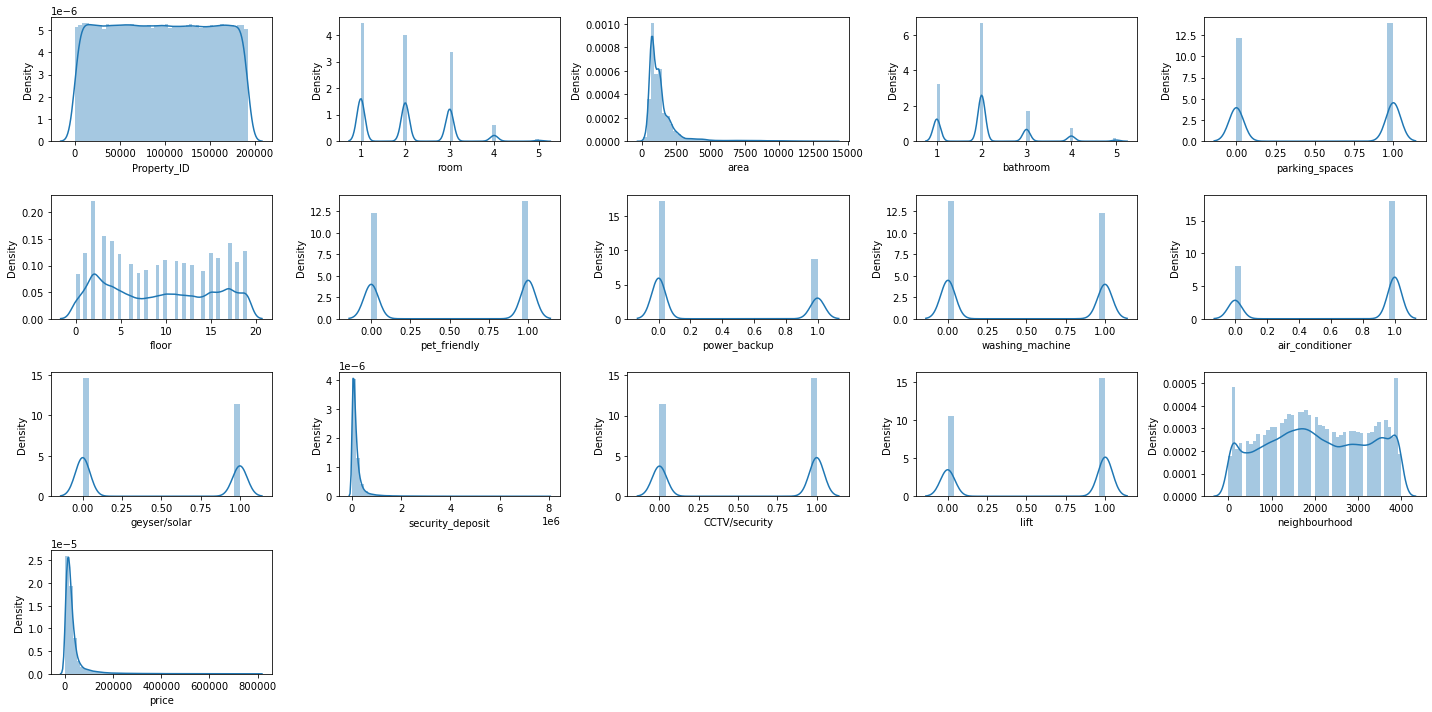

In [10]:
plt.figure(figsize=[20,10])
a=1
for i in df.select_dtypes(np.number).columns:
    plt.subplot(4,5,a)
    sns.distplot(df.loc[:,i])
    a+=1
    plt.tight_layout()
plt.show()

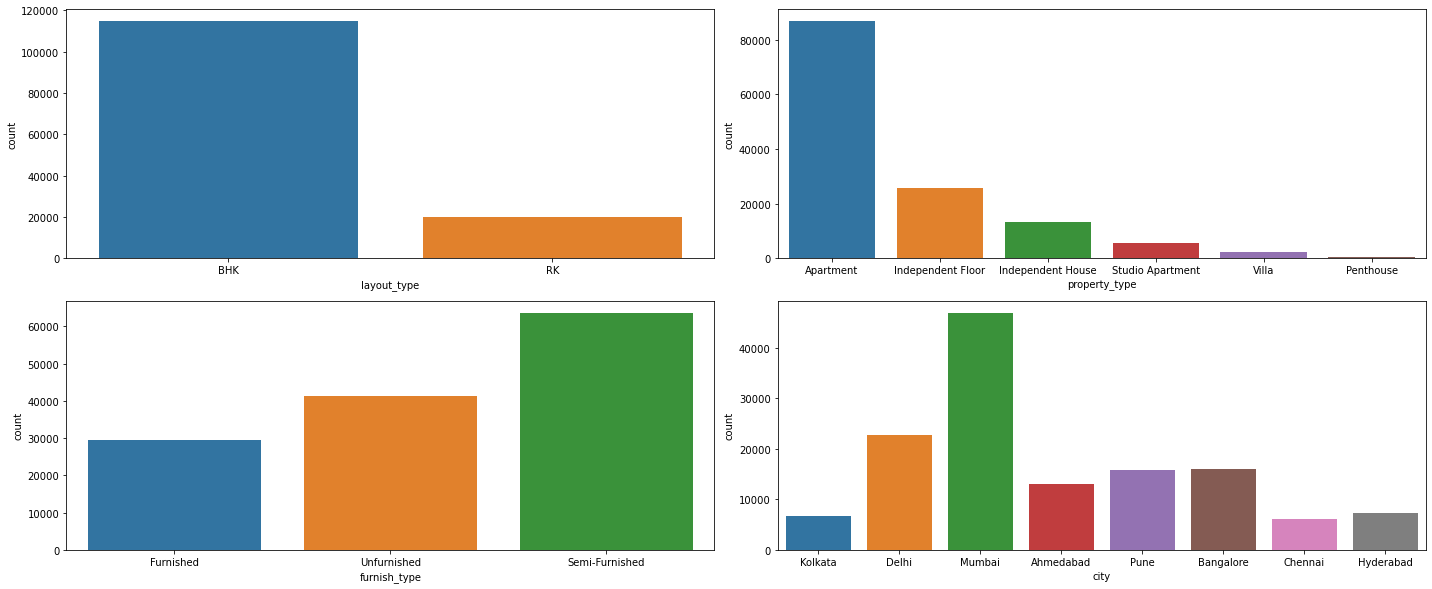

In [11]:
plt.figure(figsize=[20,20])

a=1
for i in df.select_dtypes(np.object).columns:
    if i not in ['Property_ID','locality']:
        plt.subplot(5,2,a)
        sns.countplot(df[i])
        a+=1
        plt.tight_layout()

1) mostly people prefers BHK
2) mostly pepole prefers Apartment type houses
3) mostly people prefer semi-furnished homes
4) most rented house place is mumbai

In [12]:
df.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'security_deposit', 'CCTV/security', 'lift',
       'neighbourhood', 'price'],
      dtype='object')

In [13]:
cols=['room', 'layout_type', 'property_type',
    'furnish_type', 'bathroom', 'city', 'parking_spaces', 'floor',
       'pet_friendly', 'power_backup', 'washing_machine', 'air_conditioner',
       'geyser/solar', 'CCTV/security', 'lift',
       'neighbourhood']

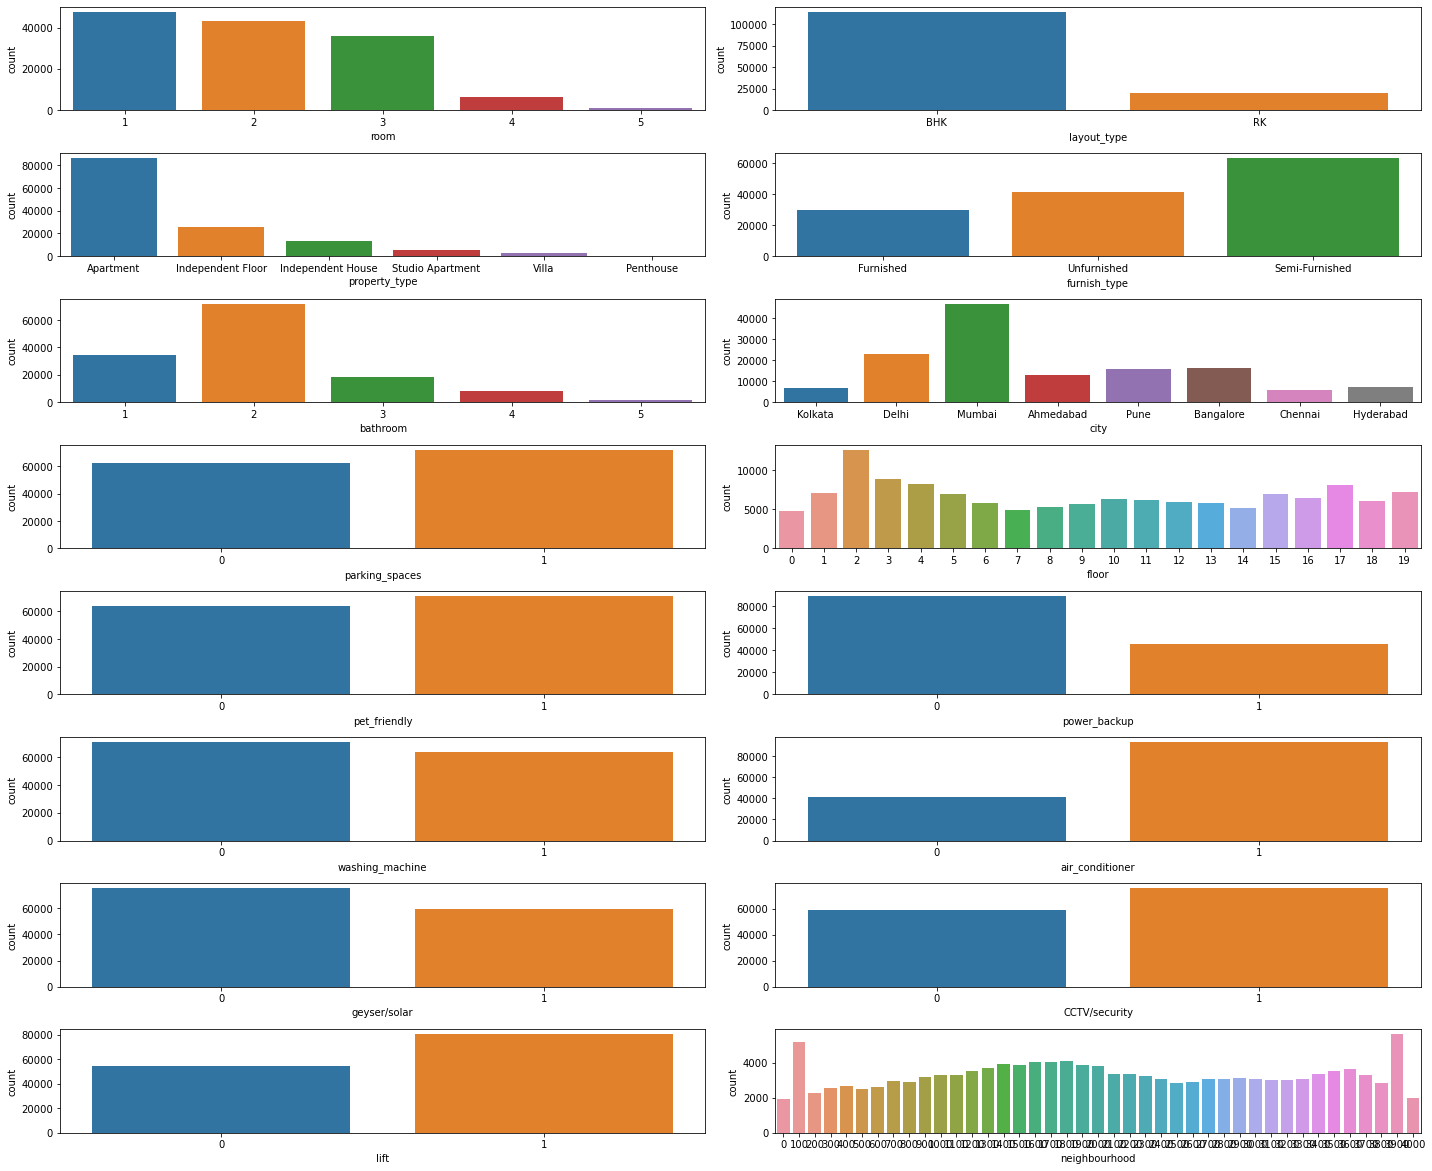

In [14]:
plt.figure(figsize=[20,20])

a=1
for i in cols:
    plt.subplot(10,2,a)
    sns.countplot(df[i])
    a+=1
    plt.tight_layout()

## BIVARIATE ANALYSIS

<AxesSubplot:>

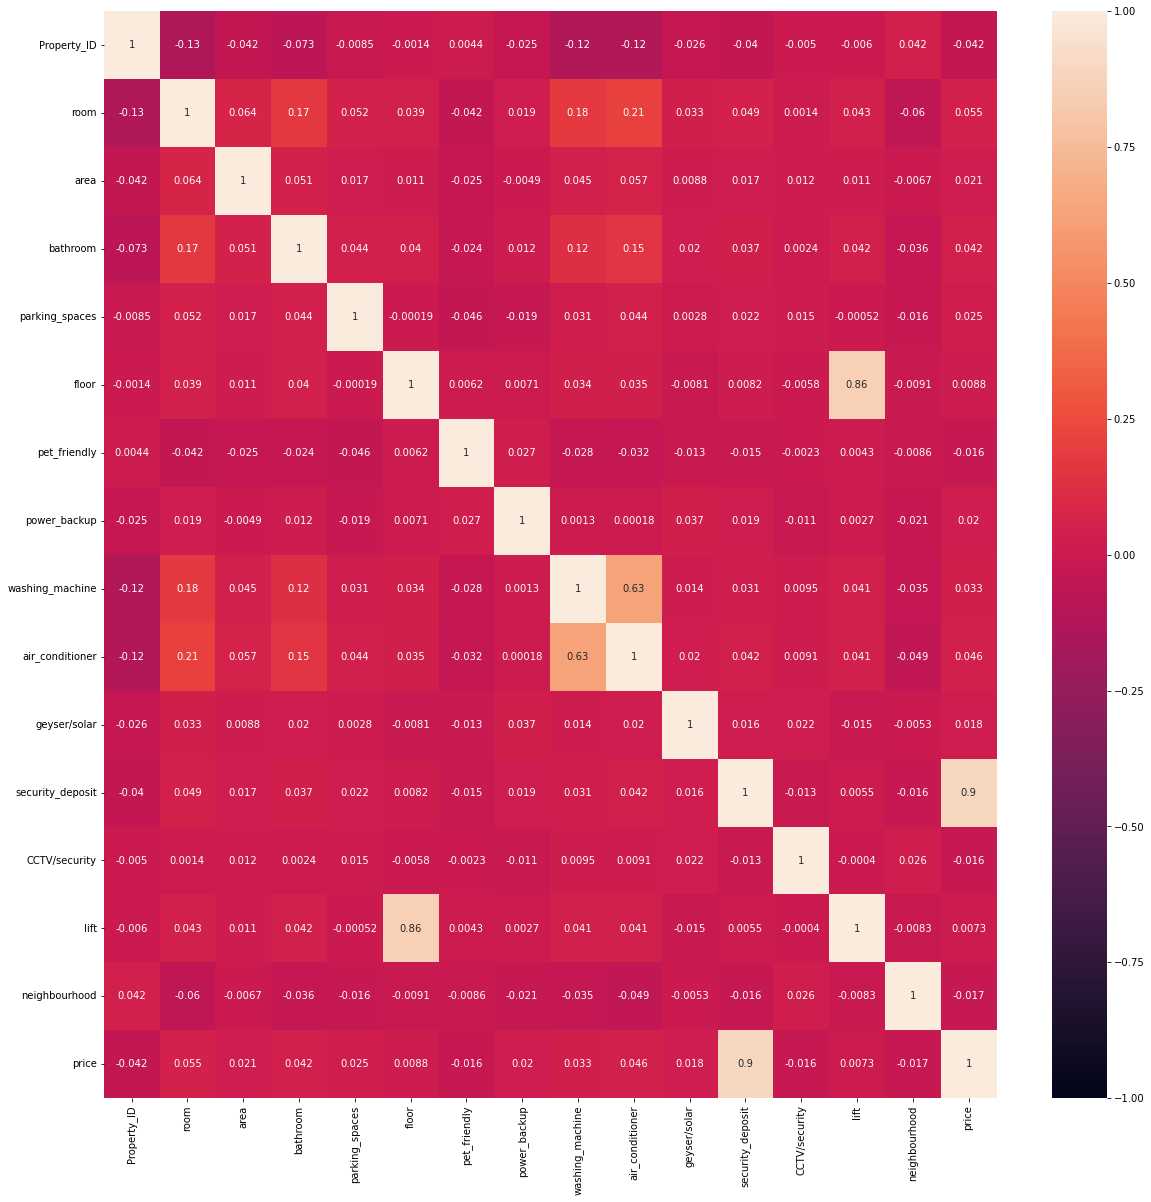

In [15]:
plt.figure(figsize=[20,20])

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

<AxesSubplot:xlabel='washing_machine', ylabel='price'>

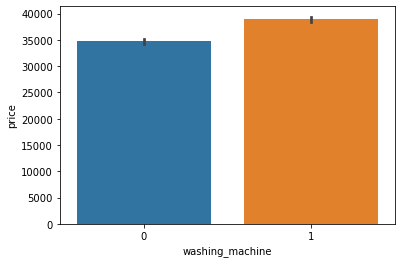

In [16]:
sns.barplot(x='washing_machine',y='price',data=df)

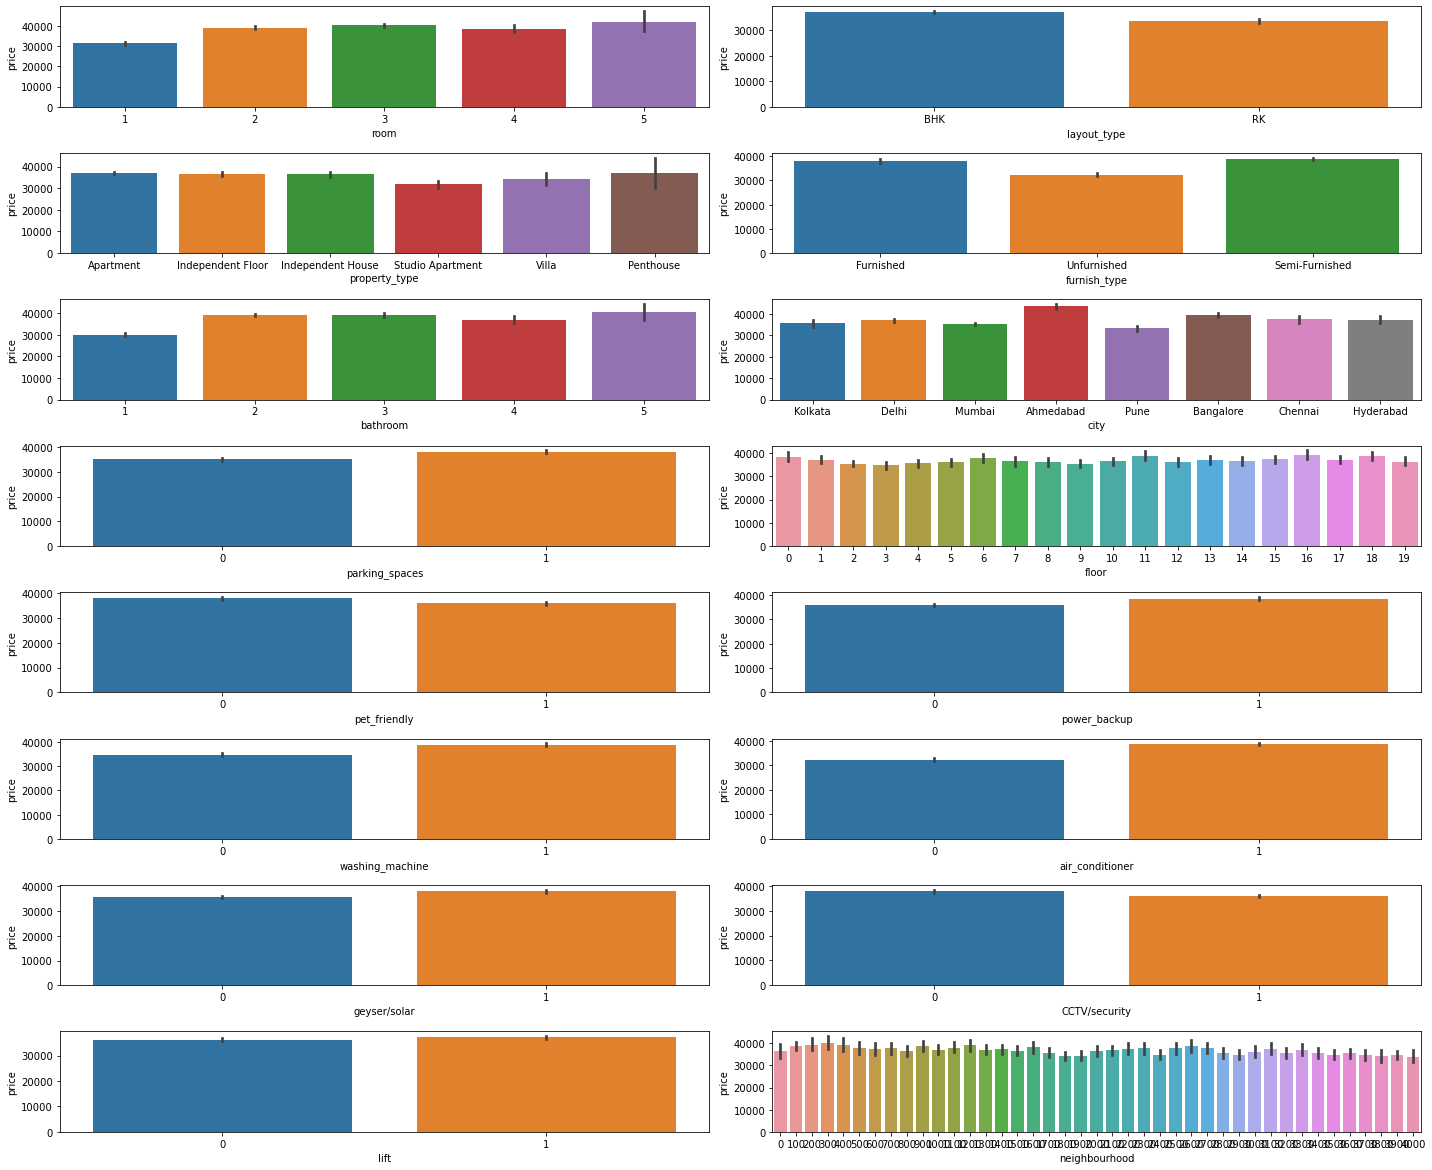

In [17]:
plt.figure(figsize=[20,20])

a=1
for i in cols:
    plt.subplot(10,2,a)
    sns.barplot(x=i,y='price',data=df)
    a+=1
    plt.tight_layout()
plt.show()

In [30]:

x=train.drop(['price','Property_ID','locality'],axis=1)
y=train.price
x=pd.get_dummies(x,drop_first=True)
x_c=sm.add_constant(x)

In [31]:
xtrain_c,xtest_c,ytrain_c,ytest_c=train_test_split(x_c,y,test_size=0.3,random_state=1)

In [32]:
model_lg=sm.OLS(ytrain_c,xtrain_c).fit()


In [33]:
model_lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.233e+04
Date:                Tue, 06 Sep 2022   Prob (F-statistic):               0.00
Time:                        12:01:14   Log-Likelihood:            -9.3299e+05
No. Observations:               80136   AIC:                         1.866e+06
Df Residuals:                   80108   BIC:                         1.866e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4504.7770    378.736     11.894      0.000    3762.457    5247.097
room                              283.4019    108.681      2.608      0.009      70.387     496.417
area                                0.2214      0.069      3.212      0.001       0.086       0.357
bathroom                          410.8525    115.282      3.564      0.000     184.900     636.805
parking_spaces                    775.5931    195.935      3.958      0.000     391.561    1159.625
floor                              13.1960     31.587      0.418      0.676     -48.714      75.106
pet_friendly                     -468.9019    195.513     -2.398      0.016    -852.107     -85.697
power_backup                      402.4218    206.745      1.946      0.052      -2.796     807.640
washing_machine                  -162.4786    126.294     -1.287      0.198    -410.015      85.057
air_conditioner                  2705.2419    243.416     11.114      0.000    2228.148    3182.336
geyser/solar                      443.0019    196.569      2.254      0.024      57.728     828.276
security_deposit                    0.1335      0.000    574.165      0.000       0.133       0.134
CCTV/security                    -619.1101    196.492     -3.151      0.002   -1004.234    -233.987
lift                              117.4336    384.086      0.306      0.760    -635.373     870.240
neighbourhood                      -0.1220      0.084     -1.452      0.146      -0.287       0.043
layout_type_RK                   -432.6627    276.251     -1.566      0.117    -974.112     108.787
property_type_Independent Floor    30.6893    253.571      0.121      0.904    -466.308     527.687
property_type_Independent House  -482.4777    331.191     -1.457      0.145   -1131.609     166.654
property_type_Penthouse           757.0534   1593.251      0.475      0.635   -2365.708    3879.815
property_type_Studio Apartment   -442.2401    489.128     -0.904      0.366   -1400.928     516.448
property_type_Villa              -201.7467    739.733     -0.273      0.785   -1651.619    1248.126
furnish_type_Semi-Furnished      -162.4786    126.294     -1.287      0.198    -410.015      85.057
furnish_type_Unfurnished         1799.5350    224.913      8.001      0.000    1358.706    2240.364
city_Bangalore                  -1102.7709    421.742     -2.615      0.009   -1929.382    -276.160
city_Chennai                    -2126.6257    553.514     -3.842      0.000   -3211.510   -1041.742
city_Delhi                      -1127.3375    394.983     -2.854      0.004   -1901.502    -353.173
city_Hyderabad                   -541.0692    522.520     -1.036      0.300   -1565.205     483.066
city_Kolkata                    -1526.4996    540.326     -2.825      0.005   -2585

In [34]:
pred_lg=model_lg.predict(xtest_c)

In [35]:
mean_squared_error(ytest_c,pred_lg,squared=False)

27679.384810449636

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.3)

In [44]:
dt=DecisionTreeRegressor()
model_dt=dt.fit(xtrain,ytrain)

In [45]:
pred_dt=model_dt.predict(xtest)

In [46]:
mean_squared_error(ytest,pred_dt,squared=False)

39307.53860501875

In [48]:
import lightgbm

In [49]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
model_lgbm=lgbm.fit(xtrain,ytrain)
pred_lgbm=model_lgbm.predict(xtest)
mean_squared_error(pred_lgbm,ytest,squared=False)

27256.915612753117

In [66]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(n_estimators=800,learning_rate=0.01,max_depth=-1,num_leaves=5)
model_lgbm=lgbm.fit(xtrain,ytrain)
pred_lgbm=model_lgbm.predict(xtest)
mean_squared_error(pred_lgbm,ytest,squared=False)

26880.632453363727

In [68]:
test

,Property_ID,room,layout_type,property_type,locality,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,27345,1,BHK,Independent House,Whitefield Hope Farm Junction,1088,Semi-Furnished,1,Bangalore,1,5,1,0,1,1,0,175749,1,0,700
1,111493,1,BHK,Studio Apartment,Worli,605,Furnished,1,Mumbai,0,1,0,0,0,1,1,15072,0,0,600
2,176972,3,BHK,Apartment,Aundh,1005,Furnished,4,Pune,1,5,0,0,0,1,1,29715,1,0,1900
3,66650,3,RK,Apartment,Sarvpriya Vihar,639,Semi-Furnished,3,Delhi,1,18,1,1,1,1,1,131576,1,1,3300
4,72437,1,BHK,Apartment,Khirki Extension,580,Unfurnished,1,Delhi,0,9,0,0,0,0,1,26005,0,1,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20198,137607,1,BHK,Apartment,Andheri East,574,Unfurnished,4,Mumbai,1,16,1,0,0,0,0,228582,1,1,200
20199,43656,1,BHK,Apartment,Vanagaram,1961,Furnished,2,Chennai,0,1,1,0,0,1,0,72714,1,0,900
20200,14331,3,BHK,Apartment,Bopal,2130,Unfurnished,2,Ahmedabad,0,3,1,0,0,0,0,243550,0,0,1500
20201,80835,2,BHK,Apartment,Kirti Nagar,5637,Semi-Furnished,2,Delhi,0,9,0,0,1,1,0,111324,1,1,2600


In [93]:
test1

,Property_ID,room,layout_type,property_type,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,27345,1,BHK,Independent House,1088,Semi-Furnished,1,Bangalore,1,5,1,0,1,1,0,175749,1,0,700
1,111493,1,BHK,Studio Apartment,605,Furnished,1,Mumbai,0,1,0,0,0,1,1,15072,0,0,600
2,176972,3,BHK,Apartment,1005,Furnished,4,Pune,1,5,0,0,0,1,1,29715,1,0,1900
3,66650,3,RK,Apartment,639,Semi-Furnished,3,Delhi,1,18,1,1,1,1,1,131576,1,1,3300
4,72437,1,BHK,Apartment,580,Unfurnished,1,Delhi,0,9,0,0,0,0,1,26005,0,1,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20198,137607,1,BHK,Apartment,574,Unfurnished,4,Mumbai,1,16,1,0,0,0,0,228582,1,1,200
20199,43656,1,BHK,Apartment,1961,Furnished,2,Chennai,0,1,1,0,0,1,0,72714,1,0,900
20200,14331,3,BHK,Apartment,2130,Unfurnished,2,Ahmedabad,0,3,1,0,0,0,0,243550,0,0,1500
20201,80835,2,BHK,Apartment,5637,Semi-Furnished,2,Delhi,0,9,0,0,1,1,0,111324,1,1,2600


In [98]:
test1=test.drop('locality',axis=1)


In [99]:
test1=pd.get_dummies(test1,drop_first=True)

In [100]:
x.shape

(114480, 29)

In [101]:
test1.shape

(20203, 30)

In [104]:
test1.drop('Property_ID',axis=1,inplace=True)

In [105]:
pred_lgbm1=model_lgbm.predict(test1)

In [76]:
submission=pd.DataFrame()
submission['Property_ID']=test.Property_ID

In [106]:
submission['price']=pred_lgbm1

In [72]:
Property_ID=test.Property_ID

In [74]:
type(Property_ID)

pandas.core.series.Series

In [108]:
submission.to_csv('submission.csv',index=False)

ValueError: could not convert string to float: 'BHK'